# Data Exploration 03

You're working on an exhibit for a local museum called "The Titanic Disaster". They've asked you to analyze the passenger manifests and see if you can find any interesting information for the exhibit.

The museum curator is particularly interested in why some people might have been more likely to survive than others.

## Part 1: Import Pandas and load the data

Remember to import Pandas the conventional way. If you've forgotten how, you may want to review [Data Exploration 01](https://byui-cse.github.io/cse450-course/module-01/exploration-01.html).

The dataset for this exploration is stored at the following url:

[https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/titanic.csv](https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/titanic.csv)

There are lots of ways to load data into your workspace. The easiest way in this case is to [ask Pandas to do it for you](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html).

### Initial Data Analysis
Once you've loaded the data, it's a good idea to poke around a little bit to find out what you're dealing with.

Some questions you might ask include:

* What does the data look like?
* What kind of data is in each column?
* Do any of the columns have missing values?

In [16]:
# Part 1: Enter your code below to import Pandas according to the
# conventional method. Then load the dataset into a Pandas dataframe.
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/titanic.csv')
# Write any code needed to explore the data by seeing what the first few
# rows look like. Then display a technical summary of the data to determine
# the data types of each column, and which columns have missing data.


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Part 2: Initial Exploration

Using your visualization library of choice, let's first look at some features in isolation. Generate visualizations showing:

- A comparison of the total number of passengers who survived compared to those that died.
- A comparison of the total number of males compared to females
- A histogram showing the distribution of sibling/spouse counts
- A histogram showing the distribution of parent/child counts

2114
1908
160
158


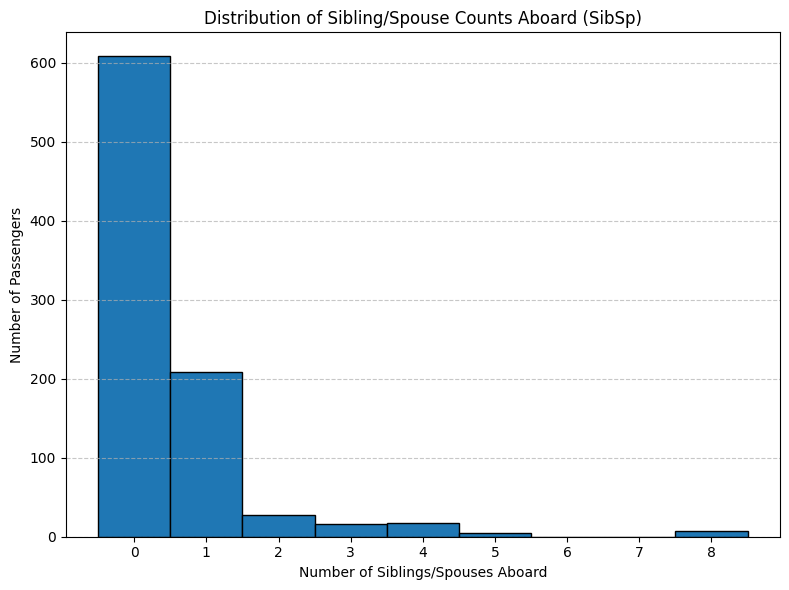

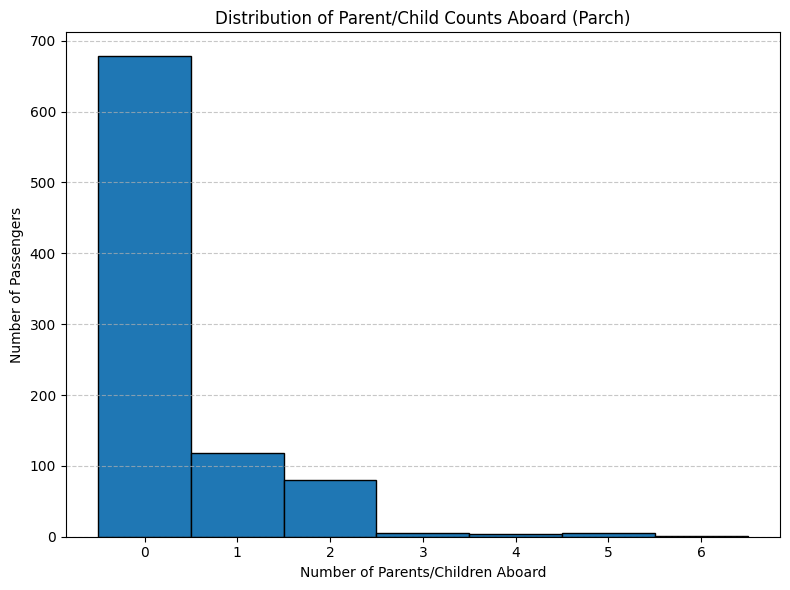

In [14]:
# Part 2: # Write the code needed to generate the visualizations specified.
import matplotlib.pyplot as plt

Passanger_lived = titanic[titanic['Survived'] == 'Yes']
Passanger_died = titanic[titanic['Survived'] == 'No']

pfemale = titanic[titanic['Sex'] == 'Female']
pmale = titanic[titanic['Sex'] == 'Male']


print(len(f"The amount of passengers who lived: {Passanger_lived}"))
print(len(f"The amount of passengers who Died: {Passanger_died}"))

print(len(f"The amount of female passengers: {pfemale}"))
print(len(f"The amount of male passengers: {pmale}"))

plt.figure(figsize=(8, 6))
plt.hist(titanic['SibSp'], bins=range(titanic['SibSp'].max() + 2), edgecolor='black', align='left')
plt.title('Distribution of Sibling/Spouse Counts Aboard (SibSp)')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Number of Passengers')
plt.xticks(range(titanic['SibSp'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(titanic['Parch'], bins=range(titanic['Parch'].max() + 2), edgecolor='black', align='left')
plt.title('Distribution of Parent/Child Counts Aboard (Parch)')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Number of Passengers')
plt.xticks(range(titanic['Parch'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## Part 3: Pairwise Comparisons
Use your visualization library of choice to look at how the survival distribution varied across different groups.

- Choose some features that you think might have had some influence over the likelihood of a titanic passenger surviving.

- For each of those features, generate a chart for each feature showing the survival distributions when taking that feature into account

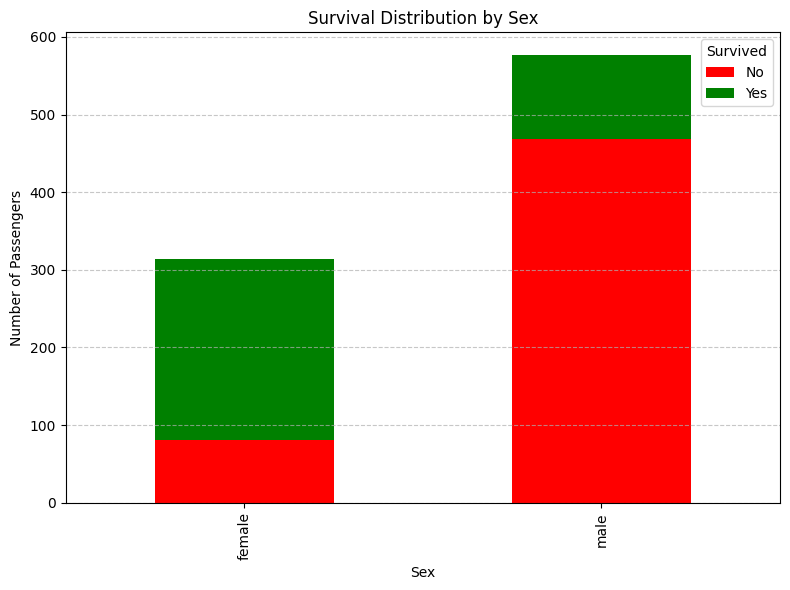

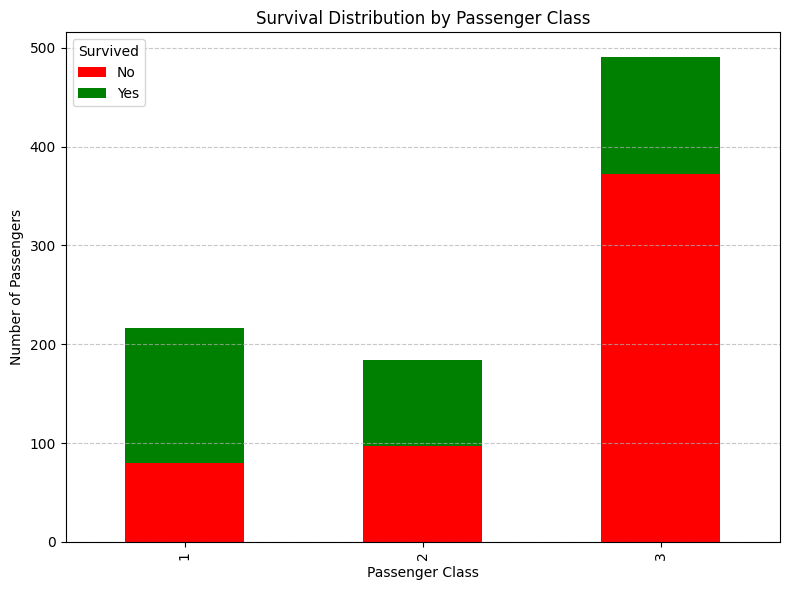

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

titanic = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/titanic.csv')

sex_survival = titanic.groupby(['Sex', 'Survived']).size().unstack()

sex_survival.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))
plt.title('Survival Distribution by Sex')
plt.ylabel('Number of Passengers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

class_survival = titanic.groupby(['Pclass', 'Survived']).size().unstack()

class_survival.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Part 4: Feature Engineering

The museum curator wonders if the passenger's rank and title might have anything to do with whether or not they survived. Since this information is embedded in their name, we'll use "feature engineering" to create two new columns:

- Title: The passenger's title
- Rank: A boolean (true/false) indicating if a passenger was someone of rank.

For the first new column, you'll need to find a way to [extract the title portion of their name](https://pandas.pydata.org/docs/getting_started/intro_tutorials/10_text_data.html). Be sure to clean up any whitespace or extra punctuation.

For the second new column, you'll need to first look at a summary of your list of titles and decide what exactly constitutes a title of rank. Will you include military and eccelsiastical titles? Once you've made your decision, create the second column.

You may want to review prior Data Explorations for tips on creating new columns and checking for lists of values.

In [28]:
# Enter the code needed to create the two new columns
import pandas as pd

# Load dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/titanic.csv')

# Extract title using str.extract (regex)
titanic['Title'] = titanic['Name'].str.extract(r',\s*([^\.]+)\.')  # Captures text between comma and period
titanic['Title'] = titanic['Title'].str.strip()  # Remove whitespace

print(titanic['Title'].value_counts())

ranked_titles = ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Sir', 'Lady', 'Don', 'Countess', 'Jonkheer']
titanic['Rank'] = titanic['Title'].isin(ranked_titles)


Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


### Revisit Visualizations
Now that you have the new columns in place. Revisit the pairwise comparison plots to see if the new columns reveal any interesting relationships.

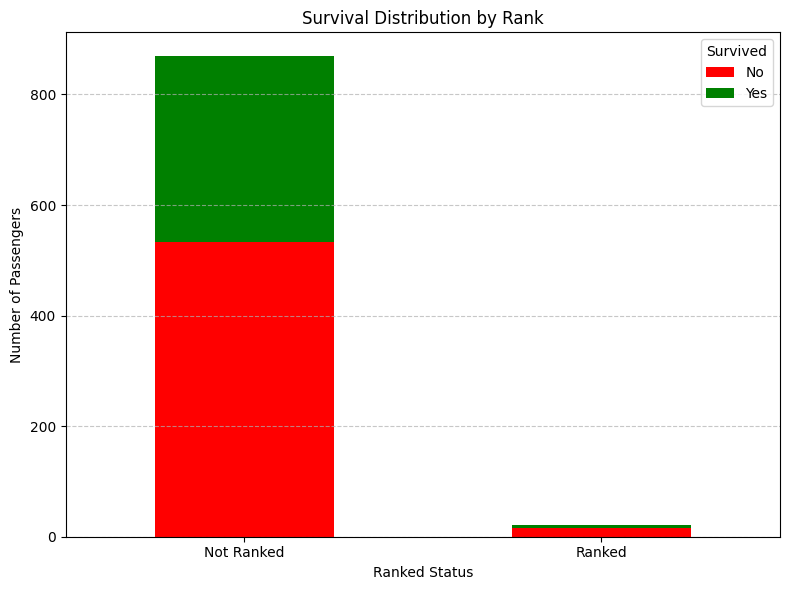

In [26]:
# Enter the code needed to recheck the pairwise comparison.
import matplotlib.pyplot as plt

rank_survival = titanic.groupby(['Rank', 'Survived']).size().unstack()
rank_survival.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))
plt.title('Survival Distribution by Rank')
plt.xlabel('Ranked Status')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], ['Not Ranked', 'Ranked'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Part 5: Encoding

The museum has partnered with a data science group to build some interactive predicitive models using the titanic passenger data.

Many machine learning algorithms require categorical features to be **encoded** as numbers.

There are two approaches to this, label encoding (sometimes called factorization), and "one-hot" encoding.

### Label Encoding

Label encoding creates numeric labels for each categorical value. For example, imagine we have a feature in the data called `Pet` with these values for the first five rows: `['Dog', 'Cat', 'Dog', 'Dog', 'Bird']`.

We could create a new feature called `Pet_Encoded` where those values are represented as: `[0, 1, 0, 0, 2]`. Where `0 = Dog, 1 = Cat, and 2 = Bird`.

In pandas there are two common ways to label encode a feature:

#### Method 1: factorize()

First, we could pandas' [factorize() method](https://pandas.pydata.org/docs/reference/api/pandas.factorize.html). It takes the series you want to encode as an argument and returns a list of two items.

The first item is an array of encoded values. The second is the set of original values.


    # The factorize() method returns the new values and the originals in a list.
    # So the [0] at the end indicates we want only the new values.
    myData['Pet_Encoded'] = pd.factorize(myData['Pet'])[0]


#### Method 2: Category Data Type
Every column in a pandas dataframe is a certain datatype. Usually, pandas infers which datatype to use based on the values of the column. However, we can use the `astype()` method to convert a feature from one type to another.

If we first convert a feature to the `category` datatype, we can ask pandas to create a new column in the data frame based on the category codes:

    # Convert our column to the category type
    myData['Pet'] = myData['Pet'].astype('category')
    myData['Pet_Encoded'] = myData['Pet'].cat.codes


Whichever method we choose, our machine learning algorithm could use the new `Pet_Encoded` feature in place of the `Pet` feature.




In [ ]:
# Create a new column in the dataset called "Sex_Encoded" containing the
# label encoded values of the "Sex" column
titanic['Sex'] = titanic['Sex'].astype('category')
titanic['Sex_Encoded'] = titanic['Sex'].cat.codes
titanic.head()

### One-Hot Encoding

One problem with label encoding is that it can make a categorical variable appear as if it contains a quantitative relationship between its values.

In the example above, is Bird twice as important as Cat? Some algorithms might interpret those values that way.

One-Hot encoding avoids this problem by creating a new feature for each category. The value of the new feature is either `0` (is not this value) or `1` (is this value).

In pandas, we can use the [get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) method to deal with this problem:

    myEncodedData = pd.get_dummies(myData, columns=['Pet'])

In the case of our `Pet` example, the new features created by `get_dummies()` would be:

| Pet_is_Dog | Pet_is_Cat | Pet_is_Bird |
|:----------:|:----------:|:-----------:|
|      1     |      0     |      0      |
|      0     |      1     |      0      |
|      1     |      0     |      0      |
|      1     |      0     |      0      |
|      0     |      0     |      1      |

Notice that for our data, if `Pet_is_Bird` = 0 and `Pet_is_Cat` = 0, we know that the pet has to be a dog. So the `Pet_is_Dog` column contains redundant information. When this happens, we say that our data contains a _multicollinearity_ problem.

To avoid this, we can tell `get_dummies()` that we want to get rid of one of the columns using the `drop_first` parameter:

    myEncodedData = pd.get_dummies(myData, columns=['Pet'], drop_first=True)

The main disadvantage to One-Hot encoding is that if the feature you're encoding has a lot of different values, it can result in a lot of extra features. This can sometimes lead to poor performance with some types of algorithms.

In [ ]:
# Use the pandas get_dummies() method to one-hot encode the Embarked column.
titanicEncoded = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)
titanicEncoded.head()

## Part 6: Conclusions

Based on your analysis, what interesting relationships did you find? Write three interesting facts the museum can use in their exhibit.

## 🌟 Above and Beyond 🌟

1. There appears to be a lot of different variations of similar titles. (such as abbreviations for Miss and Mademoiselle).

   Scan through the different titles to see which titles can be consolidated, then use what you know about data manipulation to simplify the distribution.

   Once you've finished, check the visualizations again to see if that made any difference.

2. The museum curator has room for a couple of nice visualizations for the exhibit. Create additional visualizations that are suitable for public display.
